## Plotting Software to display comparisons between ray-tracing results and predictions of various geolocation and refractive index determination techniques.

## The software requires that you have a folder identified as "ray_data" on your desktop and that the output "data.csv" file is stored into this folder. 

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/ray/Desktop/ray_data/data.csv


In [4]:
#df.info()

In [5]:
df.tail(-500)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,bearing,bx,by,bz,B,b_kx,b_kz,dip,hv_sm,th_sm,lgc_sm,hv_cm,th_cm,lgc_cm,lgc_diff_2p,lgc_diff_sm,lgc_diff_cm,nr_diff_2p
500,14,32.9,455000,10000,39.911613,-80.173836,0.865435,6594471.0,bks,17.794264,0.057817,2013-09-20 20:00:00,12.655078,368.352089,223.4710,258.161306,0.057660,368.616044,0.871602,2,39.883384,-80.224429,326.683861,16809.654630,-2470.055844,40885.522890,44275.180932,0.347909,0.923441,69.355964,115,0.068497,436.392342,131.532372,0.067686,431.227901,-0.263955,-68.040253,-62.875812,-0.006167
501,14,32.8,445000,10000,39.853771,-80.127213,0.873968,6593431.5,bks,19.059507,0.056654,2013-09-20 20:00:00,12.658186,360.941416,222.4315,251.631990,0.056511,361.294206,0.873721,2,39.828350,-80.177335,326.714042,16832.295744,-2478.992269,40846.534719,44248.287890,0.348744,0.923121,69.304029,115,0.066887,426.135066,130.739199,0.066103,421.139628,-0.352790,-65.193650,-60.198212,0.000247
502,14,32.8,455000,10000,39.914810,-80.176491,0.866586,6594051.5,bks,17.830372,0.057889,2013-09-20 20:00:00,12.654901,368.808277,223.0515,257.520117,0.057731,369.066339,0.872640,2,39.886768,-80.227328,326.682002,16808.261355,-2469.505716,40887.917824,44276.832907,0.347858,0.923461,69.359156,115,0.068497,436.392342,131.532372,0.067686,431.227901,-0.258062,-67.584065,-62.419624,-0.006054
503,14,32.7,445000,10000,39.856674,-80.129570,0.875007,6593119.0,bks,19.108007,0.056719,2013-09-20 20:00:00,12.658029,361.356046,222.1190,251.003569,0.056580,361.733289,0.874757,2,39.831651,-80.180157,326.712234,16830.938705,-2478.456822,40848.875261,44249.902328,0.348694,0.923140,69.307145,115,0.066887,426.135066,130.739199,0.066103,421.139628,-0.377244,-64.779021,-59.783582,0.000250
504,14,32.7,455000,10000,39.917770,-80.178894,0.867620,6593694.5,bks,17.878531,0.057955,2013-09-20 20:00:00,12.654740,369.231285,222.6945,256.878143,0.057801,369.515645,0.873675,2,39.890145,-80.230220,326.680147,16806.871044,-2468.956736,40890.307168,44278.481026,0.347806,0.923480,69.362341,115,0.068497,436.392342,131.532372,0.067686,431.227901,-0.284360,-67.161057,-61.996616,-0.006056
505,14,32.6,445000,10000,39.859646,-80.131935,0.876096,6592756.0,bks,19.144394,0.056786,2013-09-20 20:00:00,12.657871,361.781807,221.7560,250.374383,0.056649,362.171401,0.875789,2,39.834944,-80.182973,326.710431,16829.584579,-2477.922502,40851.210307,44251.512975,0.348644,0.923160,69.310254,115,0.066887,426.135066,130.739199,0.066103,421.139628,-0.389594,-64.353259,-59.357821,0.000307
506,14,32.6,455000,10000,39.920799,-80.181320,0.868710,6593307.0,bks,17.917665,0.058023,2013-09-20 20:00:00,12.654579,369.666468,222.3070,256.235388,0.057872,369.963960,0.874708,2,39.893514,-80.233107,326.678296,16805.483703,-2468.408904,40892.690915,44280.125285,0.347755,0.923500,69.365519,115,0.068497,436.392342,131.532372,0.067686,431.227901,-0.297492,-66.725874,-61.561433,-0.005998
507,14,32.5,445000,10000,39.862793,-80.134491,0.877255,6592362.0,bks,19.180788,0.056856,2013-09-20 20:00:00,12.657701,362.229593,221.3620,249.744434,0.056717,362.608538,0.876820,2,39.838230,-80.185783,326.708630,16828.233372,-2477.389312,40853.539850,44253.119828,0.348594,0.923179,69.313356,115,0.066887,426.135066,130.739199,0.066103,421.139628,-0.378945,-63.905473,-58.910035,0.000435
508,14,32.5,455000,10000,39.924034,-80.183937,0.869875,6592888.0,bks,17.953798,0.058095,2013-09-20 20:00:00,12.654404,370.124555,221.8880,255.591853,0.057942,370.411284,0.875739,2,39.896875,-80.235988,326.676448,16804.099336,-2467.862224,40895.069060,44281.765682,0.347704,0.923519,69.368689,115,0.068497,436.392342,131.532372,0.067686,431.227901,-0.286729,-66.267787,-61.103347,-0.005864
509,14,32.4,445000,10000,39.865829,-80.136948,0.878366,6591986.0,bks,19.217190,0.056924,2013-09-20 20:00:00,12.657537,362.661928,220.9860,249.113725,0.056786,363.044699,0.877848,2,39.841509,-80.188587,326.706834,16826.885088,-2476.857253,40855.863885,44254.722882,0

In [6]:
df['lgc_diff_2p'].describe()

count    1.240000e+03
mean     6.417805e-15
std      1.367928e+00
min     -1.227266e+00
25%     -9.689559e-01
50%     -4.557587e-01
75%      2.397268e-01
max      4.088313e+00
Name: lgc_diff_2p, dtype: float64

In [7]:
df['nr_diff_2p'].describe()

count    1.240000e+03
mean     8.237139e-17
std      5.936254e-03
min     -1.328492e-02
25%     -4.697472e-03
50%     -4.352364e-04
75%      3.673068e-03
max      2.427601e-02
Name: nr_diff_2p, dtype: float64

In [8]:
df['h_2p'].describe()

count    1240.000000
mean      240.577115
std       103.254951
min        88.295581
25%       156.370886
50%       220.863870
75%       310.913133
max       425.986658
Name: h_2p, dtype: float64

In [9]:
bins = np.arange(-52.5, 52.5,5)

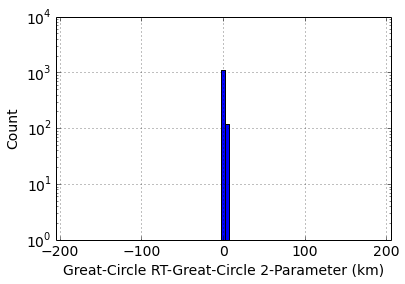

In [10]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-205, 205)
plt.ylim(1,10000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

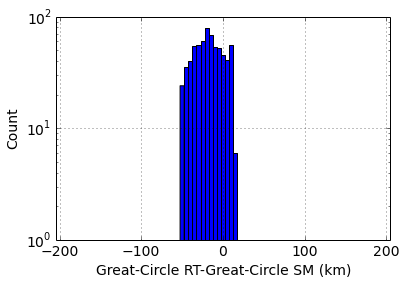

In [11]:
df['lgc_diff_sm'].hist(bins=bins, log=True)
plt.xlim(-205, 205)
plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
plt.ylabel('Count')

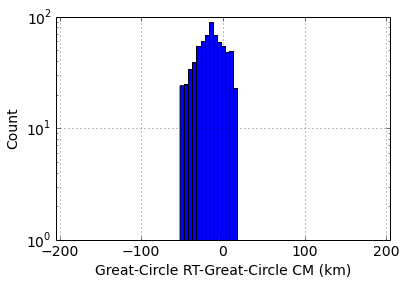

In [12]:
df['lgc_diff_cm'].hist(bins=bins, log=True)
plt.xlim(-205, 205)
plt.ylim(1, 100)
plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
plt.ylabel('Count')

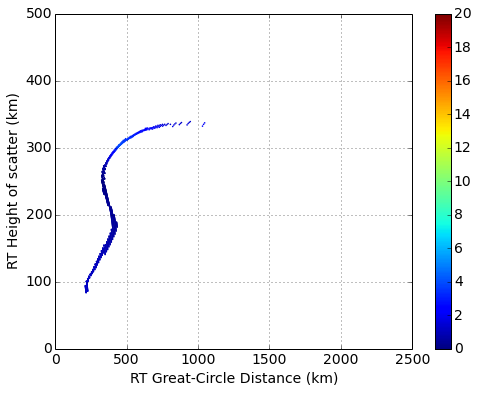

In [13]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=20) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

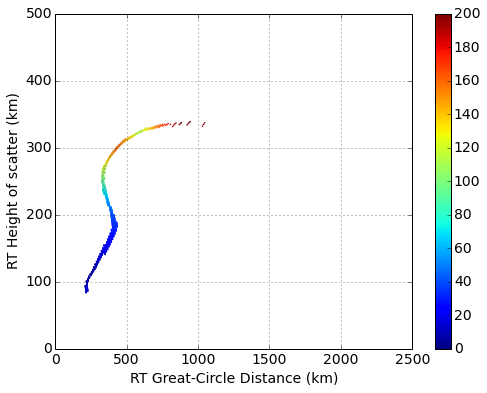

In [14]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Standard Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_sm'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=200) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

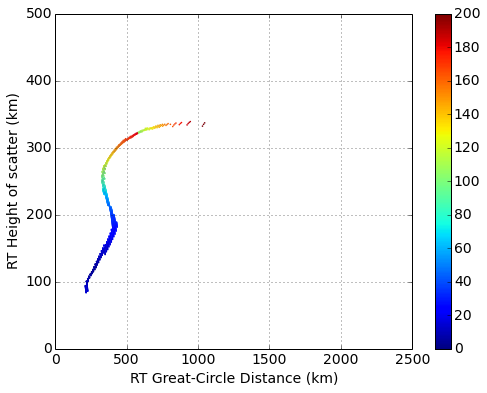

In [15]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Chisham Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_cm'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=200) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

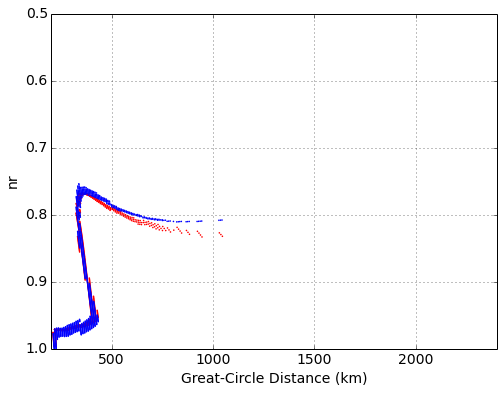

In [27]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', label='lgc_rt')
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none', label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 2400)
ax.set_ylim(1, 0.5)
ax.set_ylabel ('nr')
ax.grid()

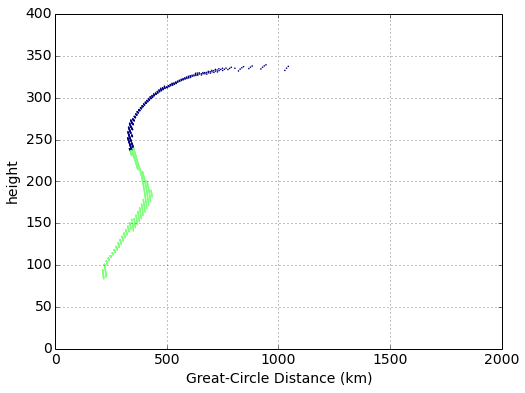

In [17]:
xvar = df['lgc_2p']
yvar = df['height']
color = df['phase']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c= color, s=10, marker='.', edgecolor='none', vmin=1, vmax=3)
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(0, 2000)
ax.set_ylim(0, 400)
ax.set_ylabel ('height')
ax.grid()
ax.legend(loc='upper right')
#Blue dots represent Phase 1 rays: penetrating rays that have have one scatter region.
#green dots represent Phase 2 rays: reflected rays that can backscatter in the bottomside
            #E-layer and F-layer before being reflected by the ionosphere. These are
            #the only rays capable of 1 1/2 hop backscatter.

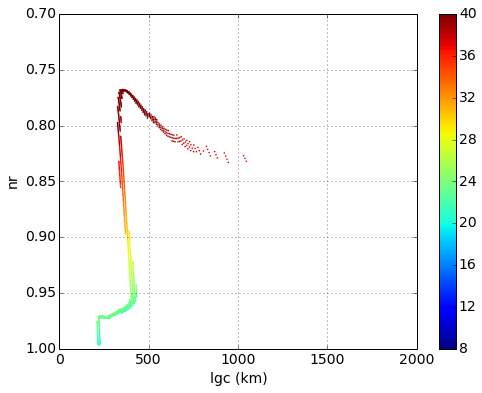

In [18]:
xvar = df['lgc_rt']
yvar = df['nr']
color = df['elv_init']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=8, vmax=40) 
plt.colorbar(scat)
ax.set_xlabel ('lgc (km)')
ax.set_xlim(0, 2000)
ax.set_ylim(1.0, 0.7)
ax.set_ylabel ('nr')
ax.grid()

In [19]:
df['lgc_diff_2p'].describe()

count    1.240000e+03
mean     6.417805e-15
std      1.367928e+00
min     -1.227266e+00
25%     -9.689559e-01
50%     -4.557587e-01
75%      2.397268e-01
max      4.088313e+00
Name: lgc_diff_2p, dtype: float64

In [20]:
df['nr_diff_2p'].describe()

count    1.240000e+03
mean     8.237139e-17
std      5.936254e-03
min     -1.328492e-02
25%     -4.697472e-03
50%     -4.352364e-04
75%      3.673068e-03
max      2.427601e-02
Name: nr_diff_2p, dtype: float64

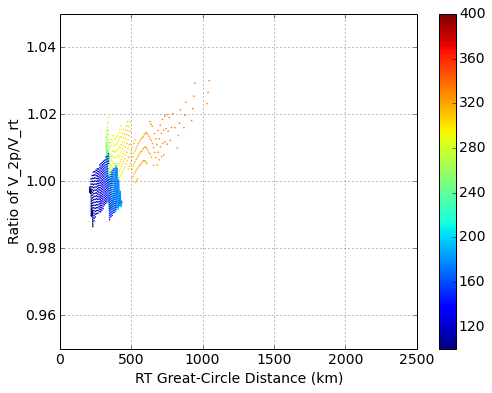

In [21]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [22]:
bins_nr = np.arange(-.0275, .0475, .005)

In [23]:
bins_nr

array([-0.0275, -0.0225, -0.0175, -0.0125, -0.0075, -0.0025,  0.0025,
        0.0075,  0.0125,  0.0175,  0.0225,  0.0275,  0.0325,  0.0375,
        0.0425])

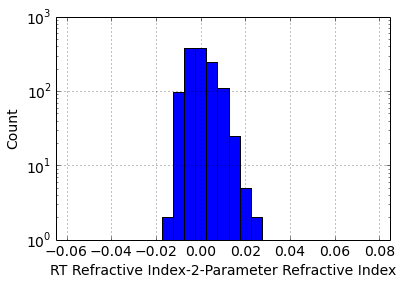

In [24]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.065, .085)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

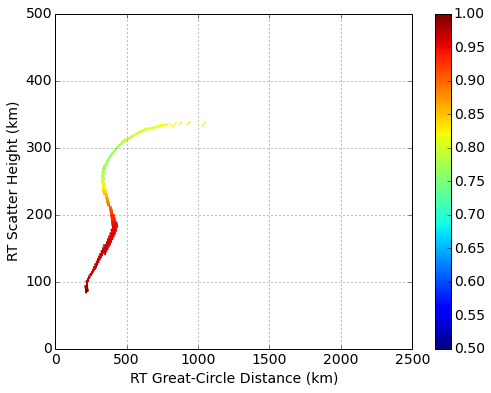

In [25]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.5, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

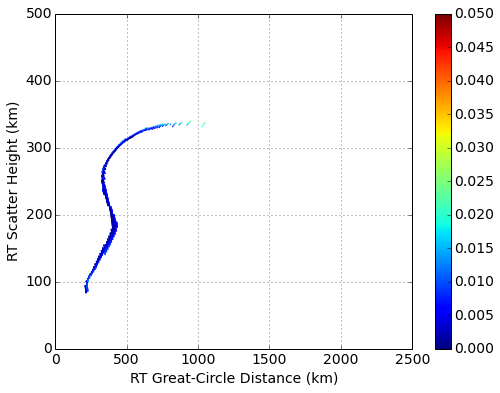

In [26]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0., vmax=0.05)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()